#### Akinator 

In [3]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Crear Dataset de personajes (categorico)
data= {
    "Nombre": ["Superman","Brad Pitt","Einstein","Harry Potter","Angelina Jolie","Sherlock Holmes"],
    "Real": ["no","si","si","no","si","no"],
    "Actor": ["no","si","no","no","si","no"],
    "Poderes":["si","no","no","si","no","no"],
    "Clase": ["Superheroe","Actor","Cientifico","Mago","Actriz","Ficcion"]
}
df=pd.DataFrame(data)
print("Dataset original")
print(df)

Dataset original
            Nombre Real Actor Poderes       Clase
0         Superman   no    no      si  Superheroe
1        Brad Pitt   si    si      no       Actor
2         Einstein   si    no      no  Cientifico
3     Harry Potter   no    no      si        Mago
4   Angelina Jolie   si    si      no      Actriz
5  Sherlock Holmes   no    no      no     Ficcion


#### Codificar variables categoricas a numericas 

In [13]:
le = LabelEncoder()
df_encoded = df.copy()
for column in ["Real","Actor","Poderes","Clase"]:
    df_encoded[column]=le.fit_transform(df[column])
print("\nDataset codificado:")
print(df_encoded)


Dataset codificado:
            Nombre  Real  Actor  Poderes  Clase
0         Superman     0      0        1      5
1        Brad Pitt     1      1        0      0
2         Einstein     1      0        0      2
3     Harry Potter     0      0        1      4
4   Angelina Jolie     1      1        0      1
5  Sherlock Holmes     0      0        0      3


#### Separar caracteristicas (x) y target (y)

In [5]:
X = df_encoded.drop(["Nombre","Clase"], axis=1)
y = df_encoded["Clase"]

#### Entrenar el arbol de decision con ID3 (entropia)

In [6]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#### Visualizar el arbol 

[Text(0.5, 0.8333333333333334, 'Real <= 0.5\nentropy = 2.585\nsamples = 6\nvalue = [1, 1, 1, 1, 1, 1]\nclass = Superheroe'),
 Text(0.25, 0.5, 'Poderes <= 0.5\nentropy = 1.585\nsamples = 3\nvalue = [0, 0, 0, 1, 1, 1]\nclass = Mago'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]\nclass = Mago'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [0, 0, 0, 0, 1, 1]\nclass = Actriz'),
 Text(0.75, 0.5, 'Actor <= 0.5\nentropy = 1.585\nsamples = 3\nvalue = [1, 1, 1, 0, 0, 0]\nclass = Superheroe'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = Cientifico'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0, 0, 0, 0]\nclass = Superheroe')]

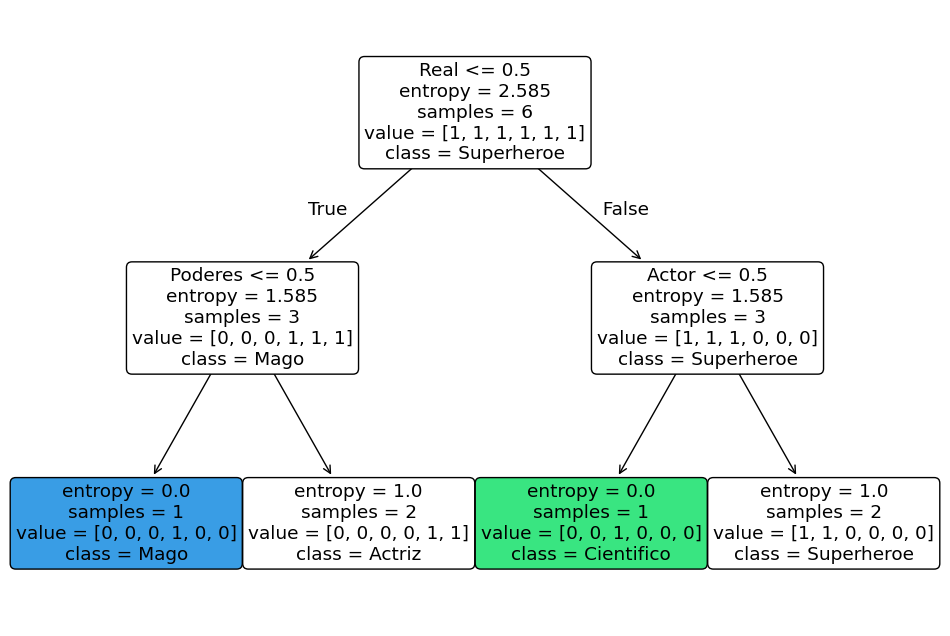

In [7]:
plt.figure(figsize=(12,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=df["Clase"].unique(),
    filled=True,
    rounded=True
)

#### Funcion para jugar (interactivo por consola)

In [34]:
def jugar(model,df):
    print("Pinesa en un personaje de la lista y responde las preguntas!")
    personajes = df["Nombre"].tolist() # .tolist() Funcion de pandas que convierte una serie en una lista 

    #Inicializar respuestas 
    respuestas = []
    for feature in X.columns:
        respuesta = input(f"¿Tu personaje es {feature}? (Sí/No) ").strip().lower() #.strip() elimina espacios en blanco y .lower() hace todo minusculas 
        respuestas.append(1 if respuesta in ["sí", "si"] else 0)
        #respuestas[feature] = 1 if respuesta == "Si" else 0 #Convertir la respuesta a 1 o 0

    #Predecir
    input_user = pd.DataFrame([respuestas], columns=X.columns) #Crear DataFrame con las respuestas del usuario
    prediccion = model.predict(input_user) #Predecir la clase del personaje
    clase_predicha = le.inverse_transform(prediccion)[0] #Invertir la codificación para obtener la clase original 
    nombre_predicho = df[df["Clase"] == clase_predicha]["Nombre"].values[0] #Obtener el nombre del personaje predicho

    print(f"Tu personaje es {nombre_predicho} ({clase_predicha})")

### Ejecutar el juego

In [37]:
print(df["Nombre"])
jugar(model,df)

0           Superman
1          Brad Pitt
2           Einstein
3       Harry Potter
4     Angelina Jolie
5    Sherlock Holmes
Name: Nombre, dtype: object
Pinesa en un personaje de la lista y responde las preguntas!
Tu personaje es Harry Potter (Mago)
